In [19]:
import sys 
#sys.path.append("codes/modules") # add custom Vibe 's modules
#sys.path.append("../..") # add standard 's modules
# sys.path.append('/home/hbkoziel/pyfesom/codes/modules')
sys.path.append('../..') # add standard 's modules
sys.path.append('../modules')

import pyfesom as pf
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset
import os
import time

In [20]:
# Loading mesh for run

mesh_id    = 'meshArc4.5'
meshpath   = '/scratch/usr/hbkoziel/mesh/'+mesh_id+'/'            # Defining path where mesh is stored
mesh = pf.load_mesh(meshpath, usepickle=True, get3d=True)                                    # Loading mesh, stores it in mesh.****  
#mesh = pf.fesom_mesh(meshpath, get3d=True)
#mesh.zlevs = -mesh.zlevs                                            # Depth is made negative

runid	= 'Arc12'
months =np.linspace(0,11,12).astype(int)

/scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh
2
The usepickle == True)
The pickle file for python 2 exists.
The mesh will be loaded from /scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh


In [21]:
# ==============================================================================
# Settings for netcdf file

save_netcdf       = True                                            # Saves the interpolated field in netcdf file
delete_old_netcdf = True                                            # If a netcdf file with the same name exists it will be deleted
input_directory  = '/scratch/usr/hbkvsk12/hlrn3_work2/results/'+runid+'/' # Where the netcdf is saved
output_directory  = '/scratch/usr/hbkoziel/'+runid+'/netcdf_monthly/'
plot_netcdf       = False                                         # Reads DIN from the created netcdf file, else it plots the interpolated field (should be the same)

In [22]:
depth = mesh.zlevs
ind_max_depth = 18
depth = depth[0:18]
print(np.shape(depth))

(18,)


In [23]:
ind_all = np.load('index_all.npy')
ind_eu = np.load('index_eurasian.npy')
ind_am = np.load('index_amerasian.npy')
ind_sl = np.load('index_slope.npy')

# Mean vertical advection

In [29]:
ncfile       = '/scratch/usr/hbkoziel/Arc12/DIN_budgetv2/VADVv2.2014.monthly.nc'
f           = Dataset(ncfile, 'r')
vadv    = f.variables['VADV'][:,:]
print np.shape(vadv)

# v_all = np.nanmean(np.nanmean(vadv[:,ind_all,:], axis = 0), axis=0) 
# v_sl = np.nanmean(np.nanmean(vadv[:,ind_sl,:], axis = 0), axis=0) 
# v_am = np.nanmean(np.nanmean(vadv[:,ind_am,:], axis = 0), axis=0) 
# v_eu = np.nanmean(np.nanmean(vadv[:,ind_eu,:], axis = 0), axis=0)
# print np.shape(v_all)

v_all = (np.nanmean(vadv[2,ind_all,:], axis = 0)) *10
v_sl = (np.nanmean(vadv[2,ind_sl,:], axis = 0))  *10
v_am = (np.nanmean(vadv[2,ind_am,:], axis = 0)) *10
v_eu = (np.nanmean(vadv[2,ind_eu,:], axis = 0)) *10
print np.shape(v_all)

(12, 753179, 16)
(16,)


0.7415984213002957


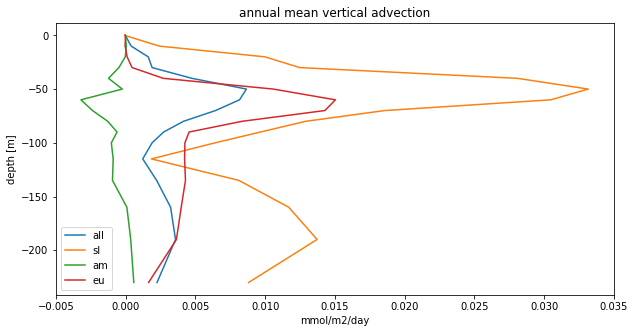

In [30]:
fig = plt.figure(figsize=(10, 5), facecolor='w', edgecolor='k')
plt.plot(v_all,-depth[:-2], label= 'all')
plt.plot(v_sl,-depth[:-2], label='sl')
plt.plot(v_am,-depth[:-2],label='am')
plt.plot(v_eu,-depth[:-2],label='eu')

plt.xlabel('mmol/m2/day')
plt.ylabel('depth [m]')
plt.title('annual mean vertical advection')
plt.legend()

print(np.trapz(v_all,depth[:-2]))

# Mean Horizontal advection

In [8]:
ncfile       = '/scratch/usr/hbkoziel/Arc12/DIN_budgetv2/HADVv2.2014.monthly.nc'
f           = Dataset(ncfile, 'r')
hadv    = f.variables['ADVH'][:,:]

h_all = np.nanmean(np.nanmean(hadv[:,ind_all,:], axis = 0), axis=0) 
h_sl = np.nanmean(np.nanmean(hadv[:,ind_sl,:], axis = 0), axis=0) 
h_am = np.nanmean(np.nanmean(hadv[:,ind_am,:], axis = 0), axis=0) 
h_eu = np.nanmean(np.nanmean(hadv[:,ind_eu,:], axis = 0), axis=0)

/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


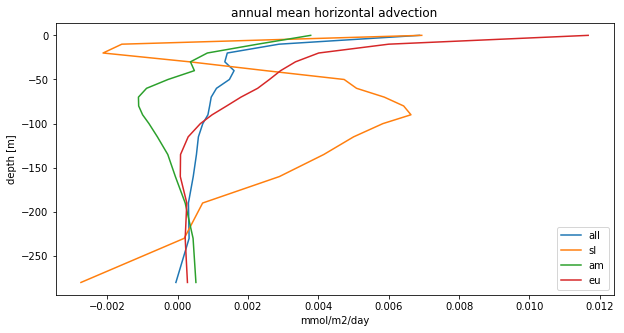

In [9]:
fig = plt.figure(figsize=(10, 5), facecolor='w', edgecolor='k')
plt.plot(h_all,-depth[:-1], label= 'all')
plt.plot(h_sl,-depth[:-1], label='sl')
plt.plot(h_am,-depth[:-1],label='am')
plt.plot(h_eu,-depth[:-1],label='eu')

plt.xlabel('mmol/m2/day')
plt.ylabel('depth [m]')
plt.title('annual mean horizontal advection')
plt.legend()

# Turbulent mixing

In [10]:
vmix = np.load('VMIX2014_Arc12_monthly.npy')

In [11]:
vmix_all = np.nanmean(np.nanmean(vmix[:,ind_all,:], axis = 0), axis=0) 
vmix_sl = np.nanmean(np.nanmean(vmix[:,ind_sl,:], axis = 0), axis=0) 
vmix_am = np.nanmean(np.nanmean(vmix[:,ind_am,:], axis = 0), axis=0) 
vmix_eu = np.nanmean(np.nanmean(vmix[:,ind_eu,:], axis = 0), axis=0)

/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


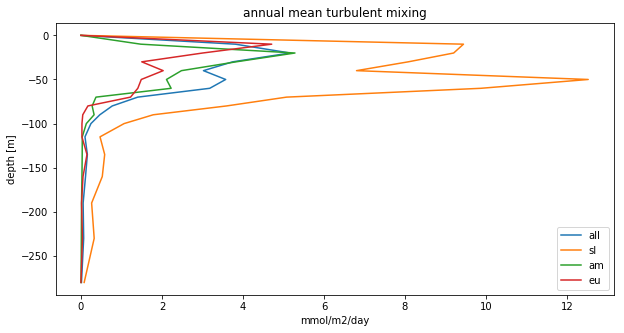

In [12]:
fig = plt.figure(figsize=(10, 5), facecolor='w', edgecolor='k')
plt.plot(vmix_all*24*3600,-depth[:-1], label= 'all')
plt.plot(vmix_sl*24*3600,-depth[:-1], label='sl')
plt.plot(vmix_am*24*3600,-depth[:-1],label='am')
plt.plot(vmix_eu*24*3600,-depth[:-1],label='eu')

plt.xlabel('mmol/m2/day')
plt.ylabel('depth [m]')
plt.title('annual mean turbulent mixing')
plt.legend()

# Check quantities

In [13]:
# Winter. (March) integration from 0 to 100m

In [14]:
np.nanmean(np.sum(vmix[2,ind_all,:10]*24*3600,axis=1)*10)

101.76964930990516

In [15]:
# Z max

In [16]:
np.nanmean(np.max(vmix[2,ind_all,:10]*24*3600,axis=1))

9.070235737966284